In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.5
    if epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [21]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=200),
                    validation_data=(test_images, test_labels),
                    epochs=30, verbose=2, callbacks=[lr_scheduler])

Epoch 1/30
300/300 - 66s - 220ms/step - accuracy: 0.8530 - loss: 0.4813 - val_accuracy: 0.1487 - val_loss: 7.5167 - learning_rate: 0.0010
Epoch 2/30
300/300 - 62s - 207ms/step - accuracy: 0.9556 - loss: 0.1477 - val_accuracy: 0.9856 - val_loss: 0.0415 - learning_rate: 0.0010
Epoch 3/30
300/300 - 63s - 210ms/step - accuracy: 0.9674 - loss: 0.1081 - val_accuracy: 0.9902 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 4/30
300/300 - 63s - 208ms/step - accuracy: 0.9749 - loss: 0.0870 - val_accuracy: 0.9914 - val_loss: 0.0234 - learning_rate: 0.0010
Epoch 5/30
300/300 - 63s - 210ms/step - accuracy: 0.9769 - loss: 0.0778 - val_accuracy: 0.9916 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 6/30
300/300 - 63s - 209ms/step - accuracy: 0.9799 - loss: 0.0676 - val_accuracy: 0.9944 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 7/30
300/300 - 63s - 211ms/step - accuracy: 0.9811 - loss: 0.0649 - val_accuracy: 0.9888 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 8/30
300/300 - 63s - 209ms/s

In [22]:
model.save('mnist_cnn_improved.h5')

In [23]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

Test accuracy: 99.59%


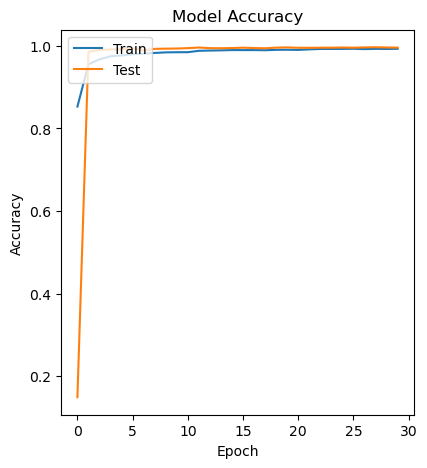

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

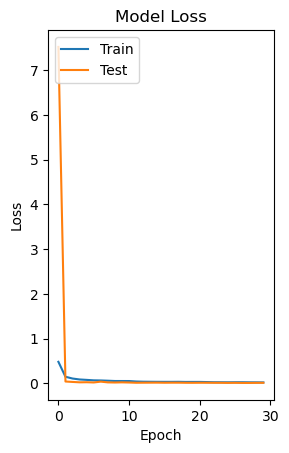

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
pred_labels = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


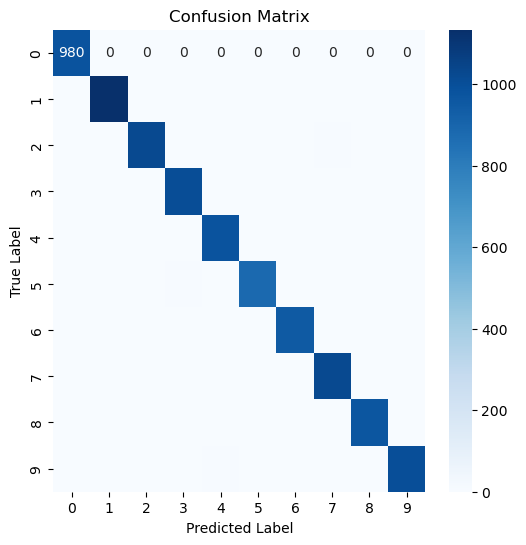

In [28]:
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

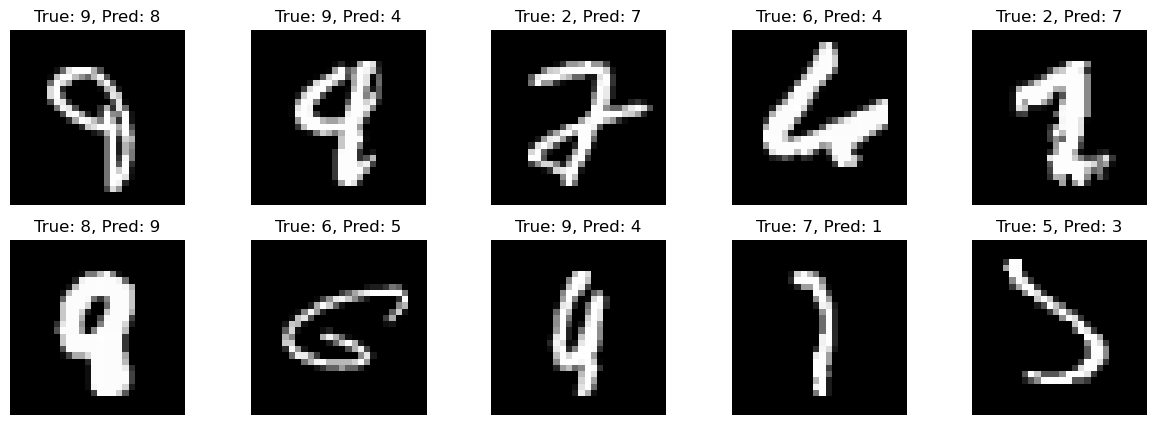

In [29]:
misclassified_indices = np.where(pred_labels != true_labels)[0]
plt.figure(figsize=(15, 5))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[index]}, Pred: {pred_labels[index]}")
    plt.axis('off')
plt.show()


In [38]:
Model= model.predict(test_images[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
